<a href="https://colab.research.google.com/github/fulloa-s/python_piscine/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week3/Salaries.csv")

CLEANING DATASET
# Missing Values (NaN)

In [200]:
data.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [201]:
data.replace(np.nan, 'N/A')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,N/A,567595.43,567595.43,2011,N/A,San Francisco,N/A
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,N/A,538909.28,538909.28,2011,N/A,San Francisco,N/A
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,N/A,335279.91,335279.91,2011,N/A,San Francisco,N/A
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,N/A,332343.61,332343.61,2011,N/A,San Francisco,N/A
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,N/A,326373.19,326373.19,2011,N/A,San Francisco,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.0,0.0,0.00,0.00,2014,N/A,San Francisco,N/A
148650,148651,Not provided,Not provided,N/A,N/A,N/A,N/A,0.00,0.00,2014,N/A,San Francisco,N/A
148651,148652,Not provided,Not provided,N/A,N/A,N/A,N/A,0.00,0.00,2014,N/A,San Francisco,N/A
148652,148653,Not provided,Not provided,N/A,N/A,N/A,N/A,0.00,0.00,2014,N/A,San Francisco,N/A


In [202]:
data.dropna(axis=1, how='all', inplace=True)
# data.dropna(inplace=True) #deeper cleaning -> Remove all columns with "any" N/A
data.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

# Duplicated records

Find duplicates

In [203]:
# data.duplicated(['EmployeeName'])

In [204]:
# data.loc[data["EmployeeName"] == "Randy D Winn"] #Example
data.drop_duplicates(['EmployeeName'], inplace=True)
# data.duplicated(['EmployeeName'])




# DESCRIPTIVE STATISTICS

In [205]:
data.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,110811.000000,110227.000000,110810.000000,110810.000000,76932.000000,110811.000000,110811.000000,110811.000000
mean,59923.440543,66186.310426,4955.522909,3640.205586,24692.664559,74433.143947,91576.352382,2012.136683
std,36770.502072,42436.024183,11347.919651,8150.869381,15406.054992,50261.668712,61588.489278,0.919599
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,28913.500000,34148.065000,0.000000,0.000000,10855.182500,36321.875000,43857.900000,2011.000000
50%,58248.000000,64927.560000,0.000000,749.640000,28439.435000,71064.610000,90046.040000,2012.000000
75%,87847.500000,94758.065000,4536.400000,4150.005000,35443.680000,105435.140000,129885.915000,2013.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


Cleaning DataFrame from negative values




In [206]:
# data.drop(data[(data.BasePay < 0) | (data.OvertimePay < 0) | (data.OtherPay < 0) | (data.TotalPay < 0) | (data.TotalPayBenefits < 0)].index, inplace=True)
# data.describe()

# Reset Index

In [207]:
data.reset_index(drop=True, inplace=True)
data.drop(axis=1, columns=["Id"], inplace=True)
data

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
110806,Kenneth Mackey,Transit Operator,0.00,0.00,15.35,0.0,15.35,15.35,2014,San Francisco
110807,Mark W Mcclure,General Laborer,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
110808,Charlene D Mccully,Parking Control Officer,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
110809,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


# Exercises

In [208]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,110227.000000,110810.000000,110810.000000,76932.000000,110811.000000,110811.000000,110811.000000
mean,66186.310426,4955.522909,3640.205586,24692.664559,74433.143947,91576.352382,2012.136683
std,42436.024183,11347.919651,8150.869381,15406.054992,50261.668712,61588.489278,0.919599
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,34148.065000,0.000000,0.000000,10855.182500,36321.875000,43857.900000,2011.000000
50%,64927.560000,0.000000,749.640000,28439.435000,71064.610000,90046.040000,2012.000000
75%,94758.065000,4536.400000,4150.005000,35443.680000,105435.140000,129885.915000,2013.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [209]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110811 entries, 0 to 110810
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      110811 non-null  object 
 1   JobTitle          110811 non-null  object 
 2   BasePay           110227 non-null  float64
 3   OvertimePay       110810 non-null  float64
 4   OtherPay          110810 non-null  float64
 5   Benefits          76932 non-null   float64
 6   TotalPay          110811 non-null  float64
 7   TotalPayBenefits  110811 non-null  float64
 8   Year              110811 non-null  int64  
 9   Agency            110811 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 8.5+ MB


In [211]:
data["OvertimePay"].max()

245131.88

In [212]:
data.loc[data["EmployeeName"] == "JOSEPH DRISCOLL", "JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [213]:
data.loc[data["EmployeeName"] == "JOSEPH DRISCOLL", "TotalPayBenefits"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [214]:
data.loc[data["TotalPayBenefits"] == data["TotalPayBenefits"].max(), "EmployeeName" ]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [215]:
data.loc[data["TotalPayBenefits"] == data["TotalPayBenefits"].min(), "EmployeeName" ]

110810    Joe Lopez
Name: EmployeeName, dtype: object

He has a negative Pay -> Activate "Cleaning DataFrame from negative values"

In [216]:
for year in range(2011, 2015):
  print(data.loc[data["Year"] == year, "BasePay" ].mean())

65597.83651425819
67758.6291117121
71611.9405302971
30916.67466987711


In [217]:
data["JobTitle"].unique().size

2136

In [218]:
data["JobTitle"].value_counts().head()

Transit Operator                4905
Registered Nurse                2529
TRANSIT OPERATOR                2267
Public Svc Aide-Public Works    2251
Firefighter                     1646
Name: JobTitle, dtype: int64

In [219]:
data.loc[data["Year"] == 2013, "JobTitle"].unique().size

1049

In [220]:
data.loc[data['JobTitle'].str.contains("Chief")].shape[0]

288

# BONUS

In [221]:
bonus = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week3/titles.csv")

In [222]:
bonus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [223]:
bonus.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [224]:
bonus.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [225]:
bonus.duplicated(['title'])

0       False
1       False
2       False
3       False
4       False
        ...  
5801    False
5802    False
5803    False
5804    False
5805    False
Length: 5806, dtype: bool

In [226]:
years = bonus["release_year"]

In [227]:
bins = np.arange(min(years), max(years) + 1, 1)

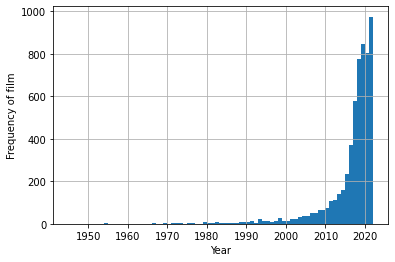

In [228]:
plt.hist(years, bins=bins)
plt.grid(True)
plt.ylabel('Frequency of film')
plt.xlabel('Year')
# plt.figure(figsize=(50,50))
plt.show()

In [229]:
net_type = bonus["type"]
labels = net_type.value_counts().keys().tolist()
counts = net_type.value_counts().tolist()

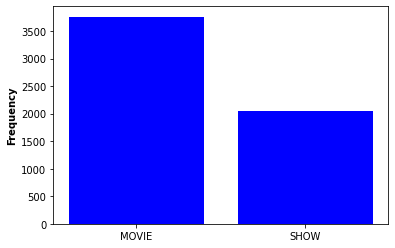

In [230]:
plt.ylabel('Frequency', fontweight='bold')
plt.bar(labels, counts, color='b')
plt.show()

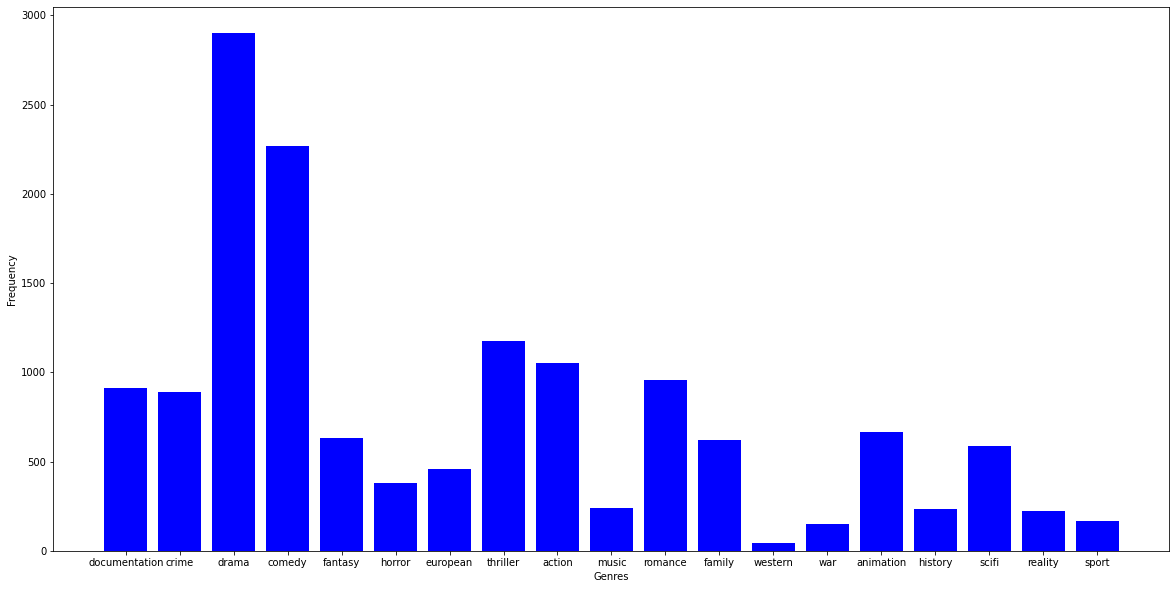

In [231]:
genre_col = bonus["genres"]
genre_list = genre_col.tolist()
for iter in range(len(genre_list)):
  genre_list[iter] = genre_list[iter].replace('\'', '',)
  genre_list[iter] = genre_list[iter].replace('[', '')
  genre_list[iter] = genre_list[iter].replace(']', '')
  genre_list[iter] = genre_list[iter].replace(' ', '')
  genre_list[iter] = genre_list[iter].split(',')
genre_dic = {}
for iter_y in range(len(genre_list)):
  for iter_x in range(len(genre_list[iter_y])):
    if(genre_dic.get(genre_list[iter_y][iter_x]) == None):
        genre_dic.update({genre_list[iter_y][iter_x]: 1})
    else:
        genre_dic[genre_list[iter_y][iter_x]] += 1

genre_dic.pop("")
plt.figure(figsize=(20, 10))
plt.ylabel("Frequency")
plt.xlabel("Genres")
plt.bar(genre_dic.keys(), genre_dic.values(), color='b')
plt.show()

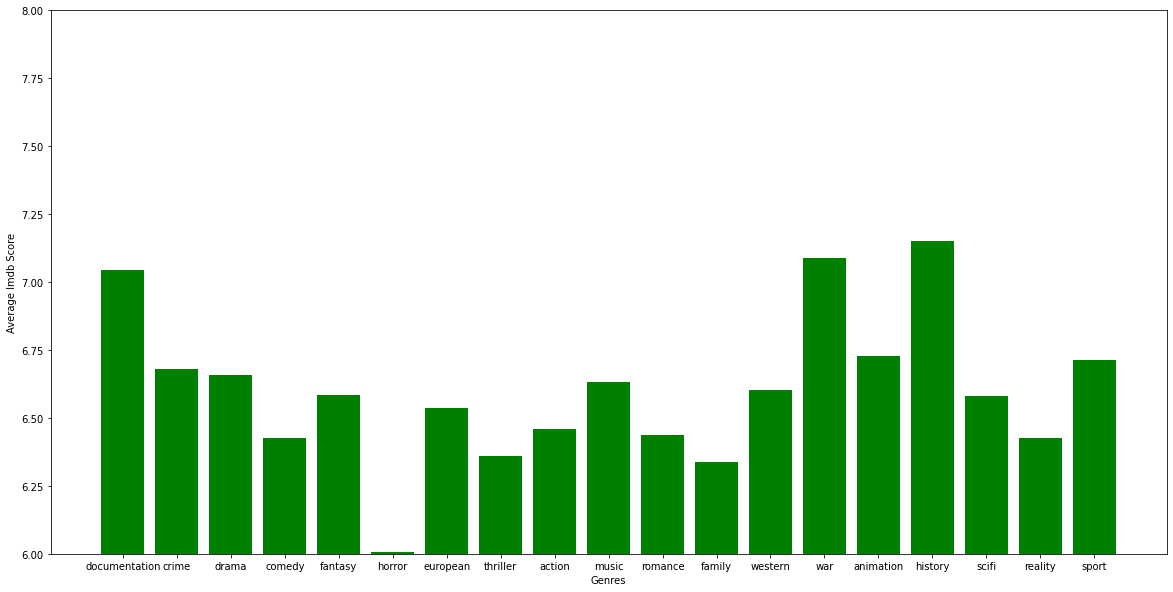

In [232]:
for key in genre_dic:
  genre_dic[key] = bonus.loc[bonus['genres'].str.contains(key), "imdb_score"].mean()
plt.figure(figsize=(20, 10))
plt.ylabel("Average Imdb Score")
plt.xlabel("Genres")
plt.ylim(6, 8)
plt.bar(genre_dic.keys(), genre_dic.values(), color='g')
plt.show()

In [233]:
# for year in range(bonus["release_year"].min(), bonus["release_year"].max()):
#   x = (bonus.loc[bonus["release_year"] == year])
# x.reset_index()
# x.loc[x['production_countries']]